First we load all our libraries

In [51]:
#First we import our required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Upload the csv file

In [52]:
# We import our data, that is in the same folder
# variable_name = pd.read_csv({path_to_csv})
data = pd.read_csv("housing.csv")

## Data Exploration

We need to know details about the DB

In [53]:
#data        #shows the DB
#data.shape  #rows,col
data.info() #summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


From info we've got the following:

- 20640 rows/entries
- Column total_bedrooms has 20433 entries (207 missing, 1% of data missing), so we DROP the nulls

In [54]:
data_cleaned = data.dropna()
data_cleaned.shape

(20433, 10)

In [55]:
data_cleaned.info
#Data with now 20433 rows, no nulls

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [56]:
#List the columns for a clearer view of them
list(data_cleaned.columns.values)
# or simply list(data_cleaned)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

# Preparation for modelling

Now we separate into X and y variables, where X is the dataset without the target variable ('median_house_value' for this case), and y is only the target variable

In [57]:
from sklearn.model_selection import train_test_split    #we import from sklearn to split the data

X = data_cleaned.drop(['median_house_value'], axis=1)   #Here we create variable 'X' with all the data BUT the target variable, 
                                                        #it is inside a list because drop() can take multiple arguments in a list
                                                        #(We can drop many columns/rows at once). For axis: 0=rows and 1=columns
                                                        # if not, default is ROWS
y = data_cleaned['median_house_value']                  #For 'y' we just select the target variable

## Split time!
Creation of *variable_train, variable_test* for X and y **by** train_test_split  

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    #Test size, as its name indicates, 
                                                                            #is the part that is untouched, for testing later
                                                                            # 1 for 100%, should be around 0.15/0.25



In [59]:
train_data = X_train.join(y_train) #We regroup the cleaned database but only with the 1-test_size data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

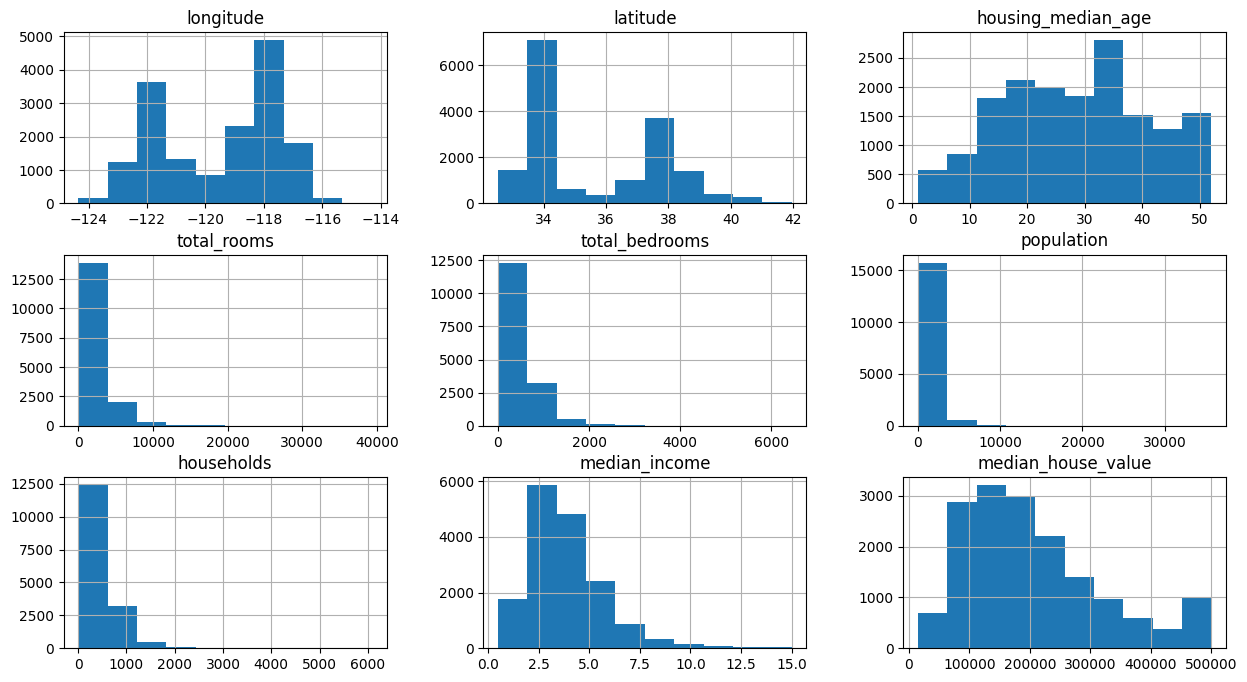

In [60]:
train_data.hist(figsize=(15,8)) #Quick check 

## HeatMap

Now, we need to see which variables (or columns) have a **correlation** with our target variable we can simply use {data}.corr for that, but a picture is worth a thousand words, for that **seaborn** comes into play for making a heatmap

### Important: 
As we have non numerical values (column = 'ocean_proximity') we could have changed those columns to a numeric value if we are interested in those, for this case we are just going to ignore them adding 'numeric_only=True' to corr()

<Axes: >

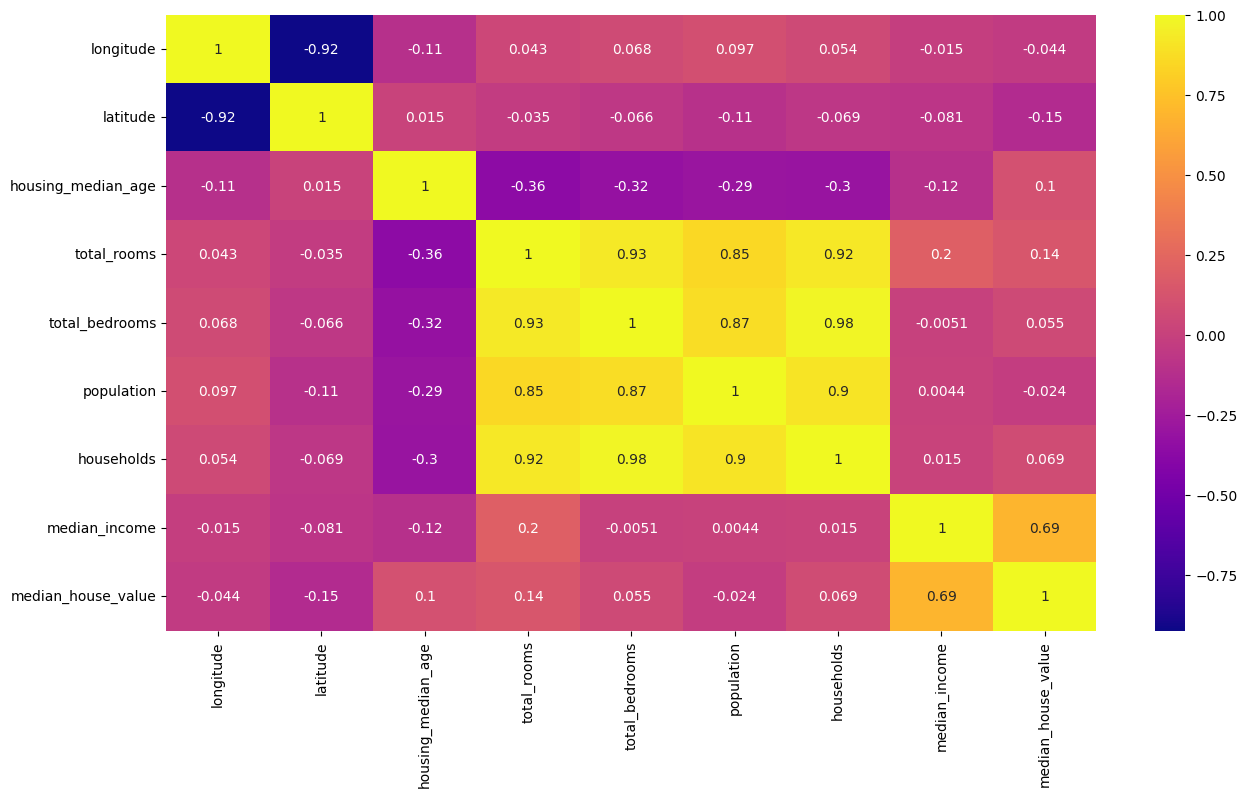

In [61]:
#train_data.corr(numeric_only=True)          #correlation between variables (linear correlation) shown in a matrix, 1 is max correlation, 
                                            #1 normally means "same column", as it is logical that the same column will have a 100% 
                                            # correlation with itself  
plt.figure(figsize=(15,8)) #I want to see them better, original size was too small, numbers overlapping
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="plasma") 
#annot=True is because i want to see the correlation coefficient for each

## Data Pre-processing

As the data has a right skewness (seen on cell #10 ```train_data.hist(figsize=(15,8))```), we have to *"normalize it"* using log for it  log(data+1) se we won't have problems with zero values, I have to look this video https://www.youtube.com/watch?v=YCwRd-N3D14 to have a better explanation of this. I should talk in another notebook about data processing, as there are several ways to *"normalize"* data

In [62]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

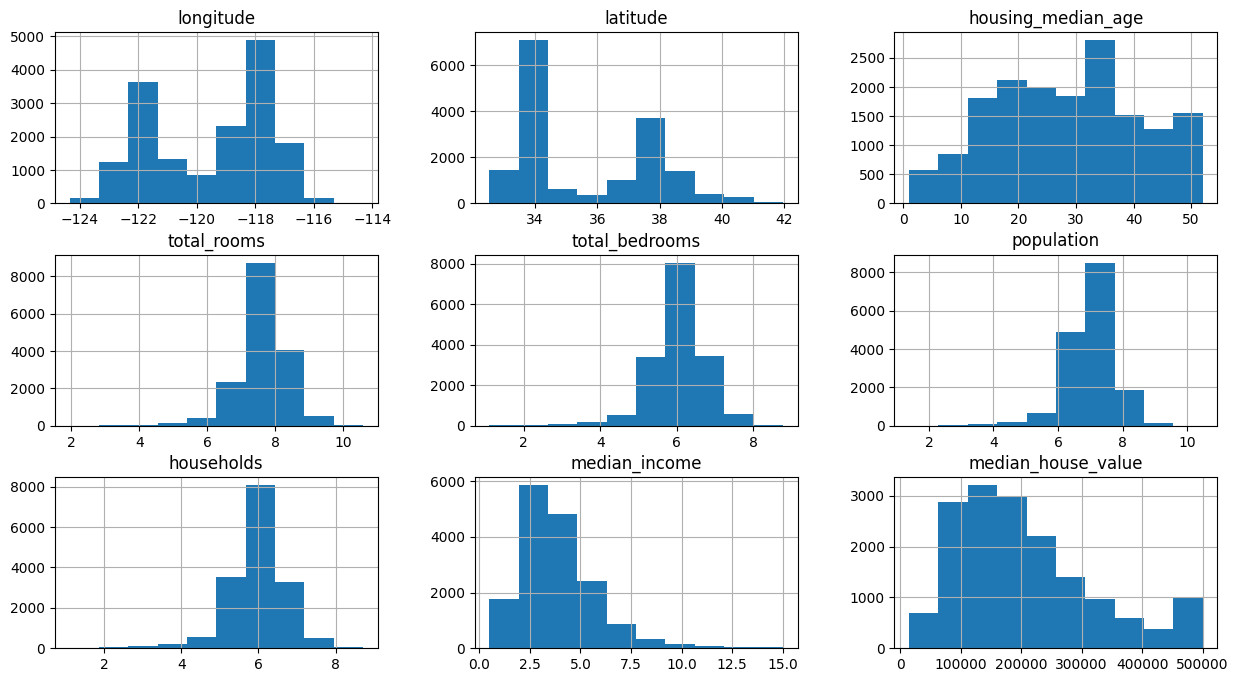

In [63]:

train_data.hist(figsize=(15,8))

As we can see, the graphs of those four columns have changed and follow a more gaussian distribution (total_rooms, total_bedrooms, population and households) (Please refer to the previous histogram plotted)

## What about the categorical feature ```ocean_proximity```?

For previous analysis, the categorical feature wasn't considered, as I ran ``corr(numeric_only=True)``, but having a look into that column, the proximity of a house to the ocean in florida should have an impact in the target variable (median_house_value), so, in order to evaluate a categorical feature, we need to transform the feature into numbers, for this case, I'm going to create a new column for each value also known as *dummies*. For that, we need to know which values exist on it.

In [64]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7232
INLAND        5175
NEAR OCEAN    2123
NEAR BAY      1812
ISLAND           4
Name: count, dtype: int64

Five values on ``ocean_proximity``, so we run get_dummies of pandas

In [65]:
pd.get_dummies(train_data.ocean_proximity)
print(pd.get_dummies(train_data.ocean_proximity).dtypes) #We check the type, we have booleans, we can change them into binary values on next line
dummyframe = pd.get_dummies(train_data.ocean_proximity).astype(int)
dummyframe

<1H OCEAN     bool
INLAND        bool
ISLAND        bool
NEAR BAY      bool
NEAR OCEAN    bool
dtype: object


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4024,1,0,0,0,0
20538,0,1,0,0,0
16794,0,0,0,0,1
6036,0,1,0,0,0
19435,0,1,0,0,0
...,...,...,...,...,...
12281,0,1,0,0,0
7922,1,0,0,0,0
15678,0,0,0,1,0
7457,1,0,0,0,0


- Add the new columns to ``train_data``
- Eliminate (or drop) the column ``ocean_proximity`` as we already have the same values


In [66]:
train_data = train_data.join(dummyframe).drop(['ocean_proximity'], axis = 1)

In [67]:
train_data.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4024     -118.52     34.18                42.0     7.385231        6.018593   
20538    -121.73     38.56                30.0     8.103797        6.445720   
16794    -122.45     37.66                36.0     8.604654        6.831954   
6036     -117.73     34.06                34.0     5.843544        4.691348   
19435    -121.04     37.67                16.0     2.995732        2.995732   
...          ...       ...                 ...          ...             ...   
12281    -116.86     33.97                11.0     6.490724        4.882802   
7922     -118.08     33.86                29.0     8.089789        6.664409   
15678    -122.43     37.80                52.0     7.589336        6.588926   
7457     -118.17     33.91                39.0     7.054450        5.613128   
19003    -121.96     38.33                 3.0     8.985445        7.137278   

       population  

Re run heatmap with the categorical variables taken into the model

<Axes: >

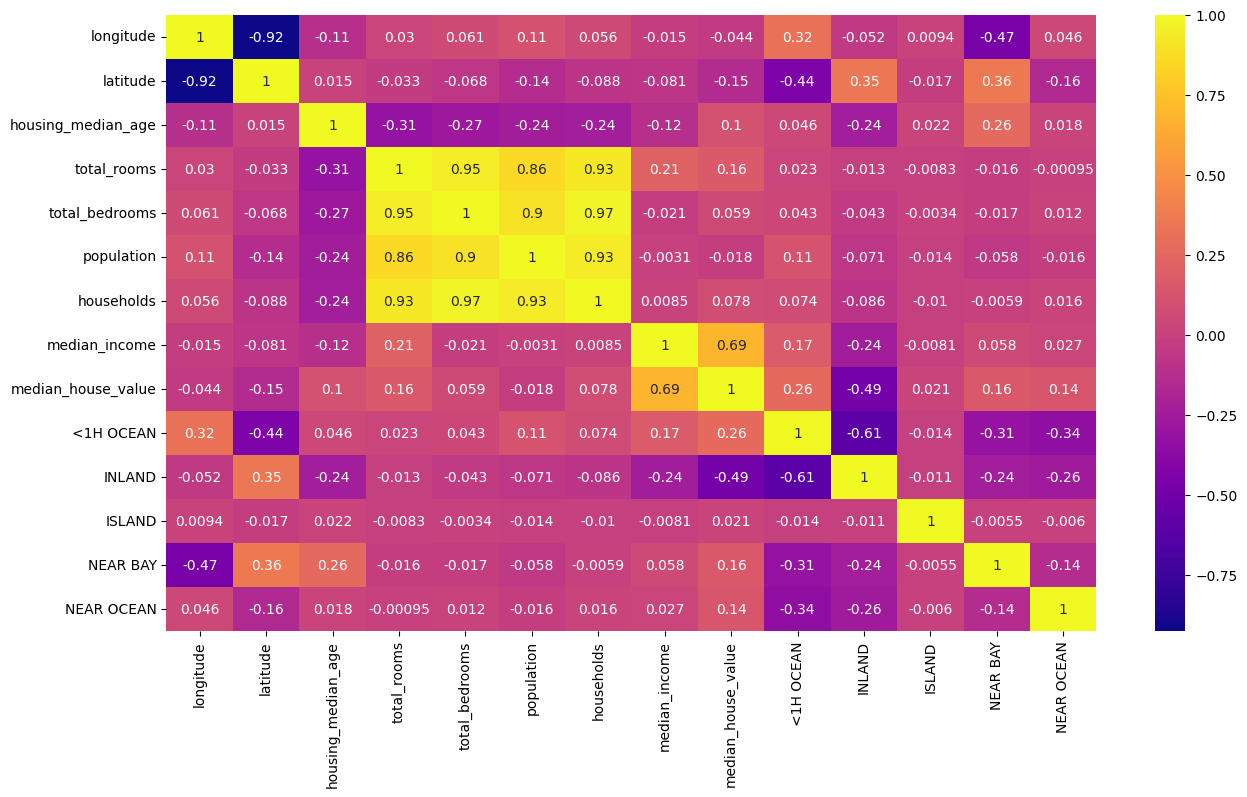

In [68]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='plasma')

<Axes: xlabel='longitude', ylabel='latitude'>

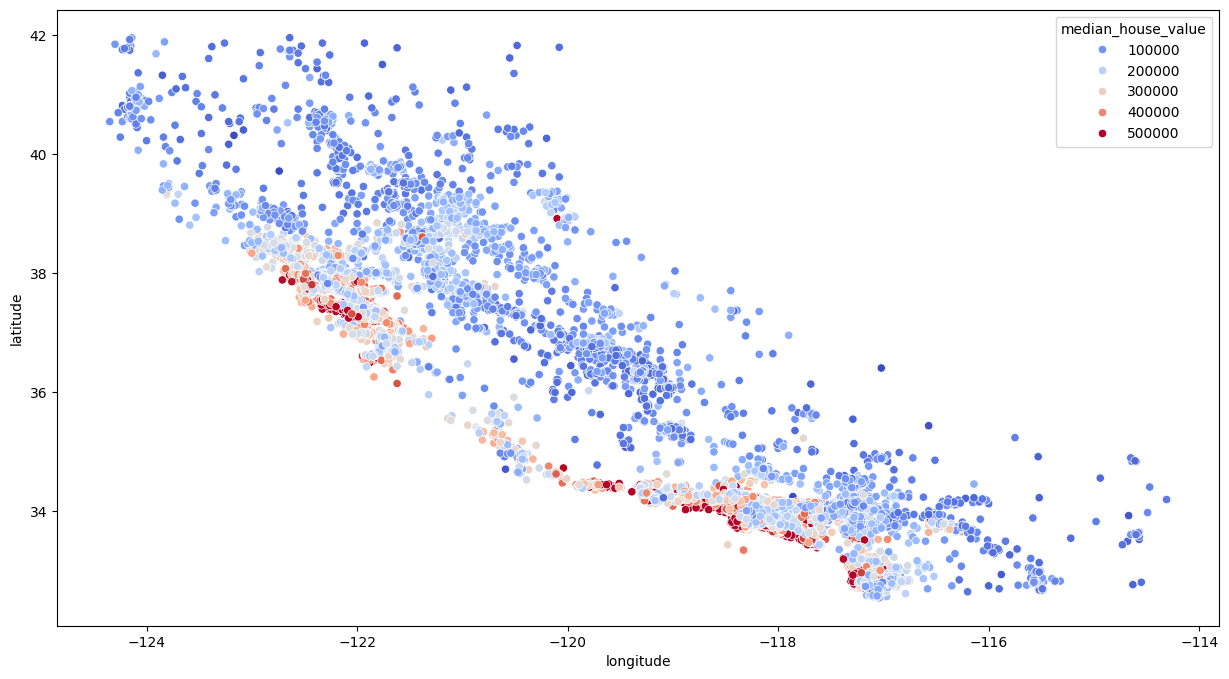

In [69]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='longitude', y='latitude', data=train_data, hue='median_house_value', palette = 'coolwarm')

![reference_img](<Captura de pantalla 2024-09-27 005620.png>)

# Feature Engineering

Mix variables

- How many bedrooms do we have per room
- Number of rooms per household on houses

In [70]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

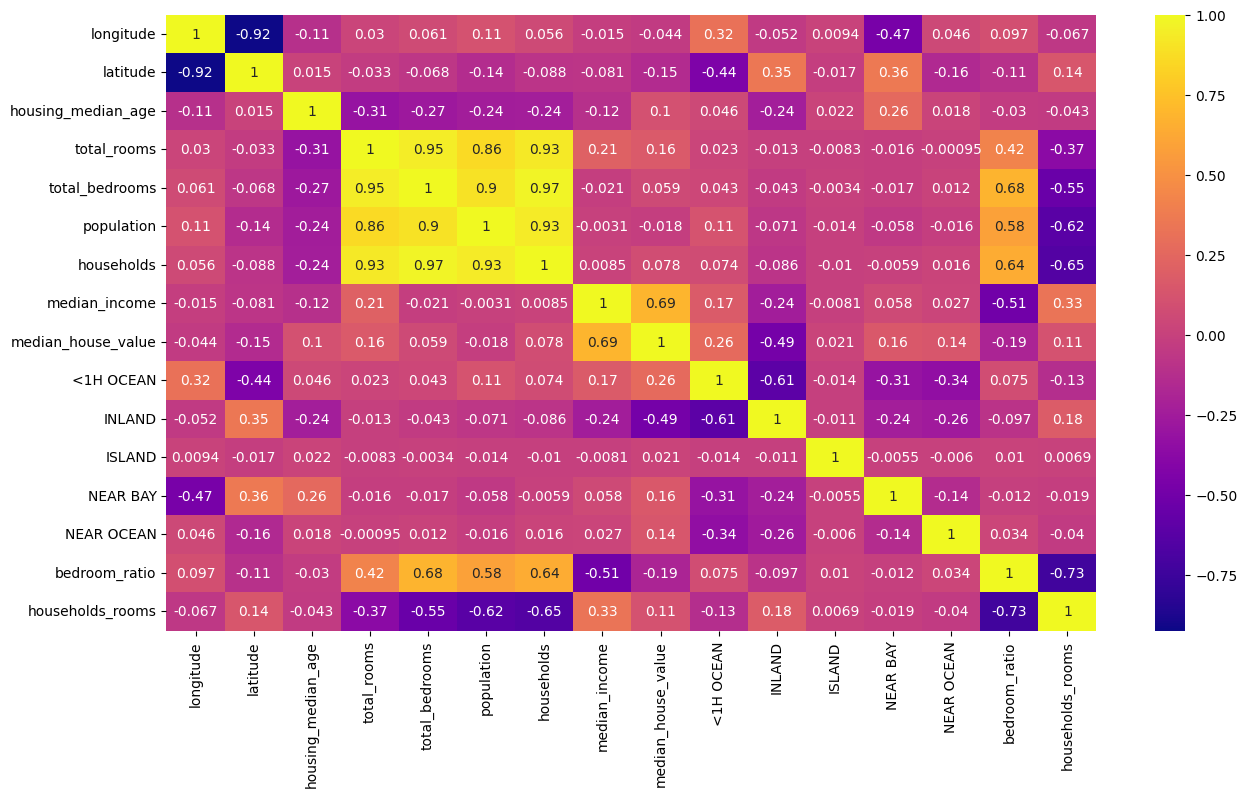

In [71]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='plasma')

# Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Divide again the train data, as we worked with it for heatmaps and stuff

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [73]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)


test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms']/test_data['households']

X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [74]:
only_in_train = set(train_data.columns) -set(test_data.columns)
only_in_train

set()

In [46]:
#train_data = train_data.drop(['ISLAND'], axis = 1)

In [83]:
X_test_s = scaler.transform(X_test)

In [84]:
reg.score(X_test, y_test)

0.6665476101680963

In [85]:
reg.score(X_test_s, y_test)

C:\Users\flpga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-391.86001338037516

# Random Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
forest.score(X_test, y_test)

0.8174584277286319

In [89]:
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [90]:
forest.score(X_test_s, y_test)

0.8180022330956707

In [92]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [3,10,30],
    'max_features': [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)

C:\Users\flpga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [93]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [94]:
best_forest = grid_search.best_estimator_
best_forest.score(X_test_s, y_test)

0.8168853016550015

In [96]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [30,50,100],
    'max_features': [8,12,20],
    'min_samples_split': [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)

C:\Users\flpga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [97]:
best_forest = grid_search.best_estimator_
best_forest.score(X_test_s, y_test)

0.8209400893140988